#<center>CNN Architectures </center>


#<center> Part 2: VGGNet 16 implementation using keras<center>

In this notebook we will build VGGNet model from the scratch using keras.

Link to the VGGNet Paper: https://arxiv.org/abs/1409.1556

**VGGNet was developed at Visual Geometry Group (VGG) in the year 2014.**

The architecture contain 16 layers out of which 13 convolutional layers, three fully connected layers. 

The key highlight is VGGNet is a deeper network with more Conv layers, pooling, and dense layers i.e a uniform architecture makes this architecture a popular.

VGGNet-16 Architecture

![VGGNet-16](https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/05_09.png)

VGGNet-16 Architecture

**Input image -->Conv 1 -->Conv 2 -->Pool -->Conv 3 -->Conv 4 -->Pool -->Conv 5 -->Conv 6 -->Conv 7 -->Pool -->Conv 8 -->Conv 9 -->Conv 10 -->Pool -->Conv 11 -->Conv 12 -->Conv 13 -->Pool -->FC 14-->FC 15 -->Softmax 16**


###Novel feartures of VGGNet

1. Unifrom layer configuration: Improves on AlexNet by replacing large kernel-sized filters with 3 x 3 kernel sized filters with **stride = 1** and a **padding - same** throughout the architecture Conv layers.

2. All pooling layers have 2 x 2 pool size and a strides value of 2.

**Benefits of small kernel sized filter**

>* Mutiple stacked small kernels is better than the larger kernel because having multiple nonlinear layers increases the depth of the network. This enables it to learn more complex features.

> * Authors have experienced that, two 3 x 3 Conv layers (without spatial pooling in between) has an effective of using 5 x 5 receptive field and in similar three 3 x 3 Conv have the effect of 7 x 7 receptive field. So using smaller 3 x 3 Conv layers with higher depth, which makes the decision function more descriminative.

> * Smaller kernel-sized filters decreases the number of training parameters. For instance, three-layer 3 x 3 convolutional with C channels, stack is parameterised as $3^2C^2 = 27C^2$ weights compared to a single 7 x 7 convolutional layer that need $7^2C^2 = 49C^2$ weights, which is 81% more parameters. 


***Receptive field - the area of the image that the filter convolved is called the receptive field***








* **Number of filters in each convolutional layer**

>>Depth (Number of filters)

>>Conv 1 & 2 - 64 layers

>>Conv 3 & 4 layer - 128 layers

>>Conv 5, 6, 7 - 256 layers

>>Conv 8, 9, 10 - 512 layers

>>Conv 11, 12, 13 - 512 layers

* **The authors have used uniform kernel_size 3 x 3 with padding 1 and stride 1** throughout the architecture

* **Max-pooling layers**

>>The **pool size is 2 x 2 with stride 2**.

>>*The authors have used **max-pooling**, which computes the maximum value of its inputs.*

* **Activation function**: The creators have used **ReLu** activation function for the hidden layers. Since ReLu has showed faster during training when used in between the hidden layers*

>>$f(x) = max(0, x)$


Summary of the layers stacked toghether are as follows

* Conv 1 & 2--> Kernel size = 3 x 3, depth = 64, and stride = 1, padding = 1 (Input image: 224 x 224 x 3)

* Pool-->2 x 2 size with stride 2, which downsamples its input dimensions from 224 x 224 to 112 x 112. (Note: layer size unaltered after pooling, so 112 x 112 x 64)

* Conv 3 & 4-->Kernel size = 3 x 3, depth = 128, and stride = 1, padding = 1 (112 x 112 x 64)

* Pool-->2 x 2 size with stride 2, which downsamples its input dimensions from 112 x 112 to 56 x 56 

* Conv 5, 6, 7-->Kernel size = 3, depth = 256, and stride = 1 (56 x 56 x 256)

* Pool-->2 x 2 size with stride 2, which downsamples its input dimensions from 56 x 56 to 28 x 28 

* Conv 8, 9, 10-->Kernel size = 3, depth = 512, and stride = 1 (28 x 28 x 512)

* Pool-->2 x 2 size with stride 2, which downsamples its input dimensions from 28 x 28 to 14 x 14

* Conv 11, 12, 13-->Kernel size = 3, depth = 512, and stride = 1 (14 x 14 x 512)

* Pool-->2 x 2 size with stride 2, which downsamples its input dimensions from 14 x 14 to 7 x 7 (7 x 7 x 512)

* FC with 4096 neurons

* FC with 4096 neurons

* Softmax layer







formula to calculate the layer dimensions

$N_{out} = {\frac{[n_{in} + 2p - k]}{s}} + 1$

Example

* **Conv layer 1 & 2**

> * Input image size 224 x 224 x 3
> * Kernel size 3 x 3
> * Stride 1 
> * Depth 64


>>$Conv 1 \& 2 = {\frac{[224 + (2\times 1) - 3]}{1}} + 1$ = $224$

> * Depth is the number of filters in the conv layer is 64 hence the output dimensions are 224 x 224 x 64

* Pooling - Max- pooling of (2, 2) result 

>>$Pool = {\frac{[224 + (2 \times 0) - 2]}{2}} + 1$ = $112$
>>The pooling layer does not change the depth of the volume. The output dimensions are 112 x 112 x 64

Similar for other Conv layers



#VGGNet Architecture implementation using keras to classify Dog and Cats of images 

####1. Import the dependencies

In [ ]:
%tensorflow_version 1.x
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

####2. Preparing the data

In [ ]:
#downloading the data

!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

!unzip /content/cats_and_dogs_filtered.zip

In [ ]:
#ImageDataGenerator class provides a quick and easy way to augment your images. It provides a host of different augmentation techniques like standardization, rotation, shifts, flips, brightness change, and many more.

data = ImageDataGenerator()
train_data = data.flow_from_directory(directory="/content/cats_dog_data/train",target_size=(224,224))
test_data = data.flow_from_directory(directory="/content/cats_dog_data/validation",target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


####4 Visualise the training images

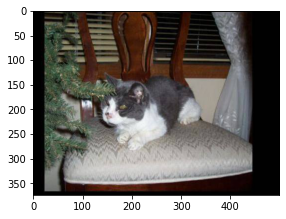

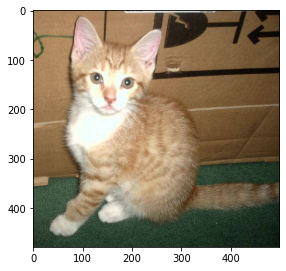

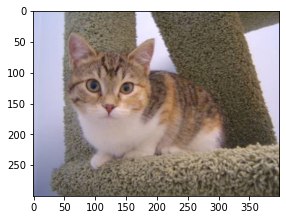

In [49]:
import matplotlib.pyplot as plt
import glob, os
    
for file in glob.glob("/content/cats_dog_data/train/cats/*.jpg")[0:3]:
    im = plt.imread(file)
    plt.figure(figsize=(15,20))
    plt.subplot(3,3,2)
    plt.imshow(im)
    plt.show()
  

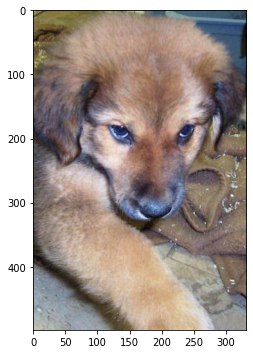

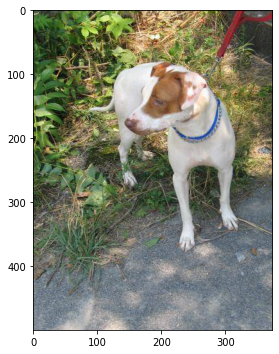

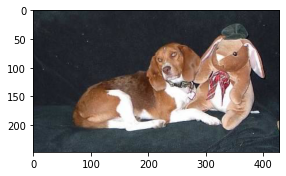

In [48]:
import matplotlib.pyplot as plt
import glob, os
    
for file in glob.glob("/content/cats_dog_data/train/dogs/*.jpg")[0:3]:
    im = plt.imread(file)
    plt.figure(figsize=(15,20))
    plt.subplot(3,3,2)
    plt.imshow(im)
    plt.show()

####5. Model architecture

![VGGNet-16](https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/05_09.png)


In [50]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=4096,activation="relu"))


model.add(Dense(units=2, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [51]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

####6. Model training & Compiling

In [68]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [69]:
hist = model.fit_generator(steps_per_epoch=100,generator=train_data, validation_data= test_data, validation_steps=5,epochs=100,callbacks=[checkpoint,early])

Epoch 1/100
 98/100 [============================>.] - ETA: 2s - loss: 14146.5969 - accuracy: 0.5010

ResourceExhaustedError: ignored

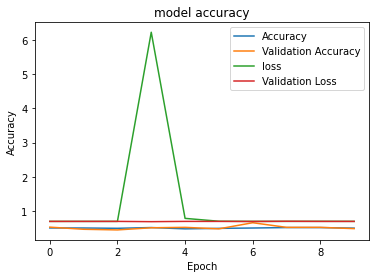

In [62]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


Loading an image of dog excluding images in dataset for testing

cat


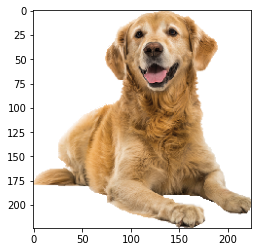

In [66]:
from keras.preprocessing import image
img = image.load_img("/content/dog_test.png",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')